# Quantitative Analysis of the tweets

In [104]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [95]:
# read Data
PATH_DATA = "../data/final/tweets_66DaysofData.csv"
df = pd.read_csv(PATH_DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40121 entries, 0 to 40120
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    40121 non-null  int64 
 1   user_id     40121 non-null  int64 
 2   user_name   40121 non-null  object
 3   created_at  40121 non-null  object
 4   full_text   40121 non-null  object
 5   retweets    40121 non-null  int64 
 6   favorite    40121 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


## For the entire data set

In [13]:
# number of tweets
print(f"Number of tweets: {df.shape[0]}")
# data range
print(f"Tweets from {df['created_at'][0].split(' ')[0]} to {df['created_at'][df. index[-1]].split(' ')[0]}")
# unique participants
print(f"Unique participats: {df['user_id'].nunique()}")

Number of tweets: 40121
Tweets from 2020-08-29 to 2023-03-22
Unique participats: 1898


In [27]:
top_5_participants = df.groupby('user_name')['user_id'].count().sort_values(ascending=False).head(5)
top_5_participants

user_name
_datajunkie       467
JackRaifer        452
roshinifer333     354
dataQueen_pend    351
meyke9976         351
Name: user_id, dtype: int64

In [47]:
# length of tweet
df["text_len"] = df["full_text"].apply(len)
#df[["full_text", "text_len"]]
print(f'Average length of tweets: {df["text_len"].mean():.2f}')
print(f'Max lenght of tweets: {df["text_len"].max()}')
print(f'Min lenght of tweets: {df["text_len"].min()}')
print(f'Median length: {df["text_len"].median()}')

Average length of tweets: 194.22
Max lenght of tweets: 383
Min lenght of tweets: 13
Median length: 201.0


### Plot of tweets over time

In [96]:
# plot with date and number of tweets
# create df with counts of tweets per day
# split the `created_at` column into date and time to make aggreation over days possible 
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = [d.date() for d in df['created_at']]
df['time'] = [d.time() for d in df['created_at']]
df.drop(['created_at'], axis=1, inplace=True)

# group by date and count number of tweets on that day
countTweetsDay = df.groupby(['date']).count()['tweet_id']
countTweetsDay = pd.DataFrame(countTweetsDay)
countTweetsDay.rename(columns={'tweet_id': 'count'}, inplace=True)

# make sure that tweet sum is equal
assert countTweetsDay['count'].sum() == df.shape[0], "should be equal"

In [83]:
countTweetsDay.head()

,count
date,
2020-08-29,28
2020-08-30,27
2020-08-31,42
2020-09-01,141
2020-09-02,165


(array([18536., 18628., 18718., 18809., 18901., 18993., 19083., 19174.,
        19266., 19358., 19448.]),
 [Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04')])

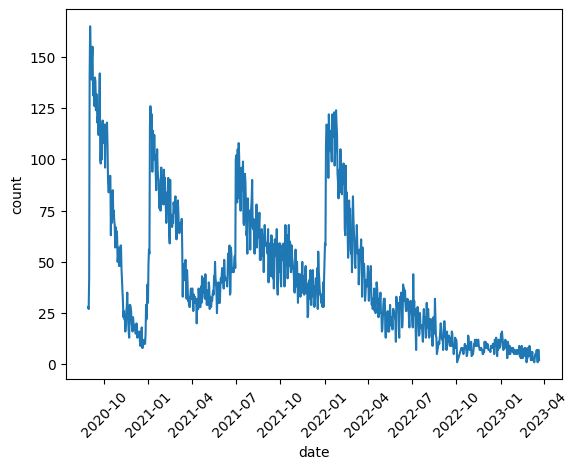

In [103]:
sns.lineplot(data=countTweetsDay, x=countTweetsDay.index, y="count")
plt.xticks(rotation= 45)

There are four peaks, becouse there were four "offical" rounds

In [ ]:
# visualization 
# very large plot
f, ax = plt.subplots(figsize=(8, 120))
sns.barplot(y=countTweetsDay.index, x= countTweetsDay['count'], color="b")
plt.yticks(fontsize=7);

## For a random user

In [126]:
# read Data
PATH_DATA = "../data/final/tweets_66DaysofData.csv"
df = pd.read_csv(PATH_DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40121 entries, 0 to 40120
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    40121 non-null  int64 
 1   user_id     40121 non-null  int64 
 2   user_name   40121 non-null  object
 3   created_at  40121 non-null  object
 4   full_text   40121 non-null  object
 5   retweets    40121 non-null  int64 
 6   favorite    40121 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [127]:
# query a random user
unique_user = df['user_id'].unique()
random_user_id = random.choice(unique_user)
user_name = df[df['user_id'] == random_user_id]['user_name'].values[0]

df_user = df[df['user_name']==user_name]
df_user = df_user.reset_index(drop=True)

In [128]:
if df_user.shape[0] < 5:
    print("User has less then 5 tweets, please draw again")

In [130]:
df_user.head()

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
0,1300452379720994817,2148453230,isparam_teraiya,2020-08-31 15:16:23+00:00,Can't wait to start #66daysofdata from tomorro...,0,8
1,1300895267680526336,2148453230,isparam_teraiya,2020-09-01 20:36:15+00:00,Day 1 of #66daysofdata!\n- Difference between ...,0,3
2,1301251412916015104,2148453230,isparam_teraiya,2020-09-02 20:11:27+00:00,Day 2 of #66daysofdata!\n\nRevised the some st...,0,3
3,1301605063673036800,2148453230,isparam_teraiya,2020-09-03 19:36:44+00:00,Day 3 of #66daysofdata!\nToday I understood th...,0,4
4,1301999928051466243,2148453230,isparam_teraiya,2020-09-04 21:45:47+00:00,Day 4 of #66daysofdata \nBuilt a strong intuit...,0,6


In [132]:
# number of tweets
print(f"Number of tweets: {df_user.shape[0]}")
# data range
print(f"Tweets from {df_user['created_at'][0].split(' ')[0]} to {df_user['created_at'][df_user.index[-1]].split(' ')[0]}")
# unique participants
assert df_user['user_id'].nunique() == 1

Number of tweets: 52
Tweets from 2020-08-31 to 2020-11-05


In [133]:
# length of tweet
df_user["text_len"] = df_user["full_text"].apply(len)
#df[["full_text", "text_len"]]
print(f'Average length of tweets: {df_user["text_len"].mean():.2f}')
print(f'Max lenght of tweets: {df_user["text_len"].max()}')
print(f'Min lenght of tweets: {df_user["text_len"].min()}')
print(f'Median length: {df_user["text_len"].median()}')

Average length of tweets: 131.83
Max lenght of tweets: 279
Min lenght of tweets: 59
Median length: 122.5


compare length of tweets etc. with global stats

### Plots

In [134]:

# plot with date and number of tweets
# create df with counts of tweets per day
# split the `created_at` column into date and time to make aggreation over days possible 
def create_data_for_plot(df: pd.DataFrame) -> pd.DataFrame:
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['date'] = [d.date() for d in df['created_at']]
    df['time'] = [d.time() for d in df['created_at']]
    df.drop(['created_at'], axis=1, inplace=True)

    # group by date and count number of tweets on that day
    countTweetsDay = df.groupby(['date']).count()['tweet_id']
    countTweetsDay = pd.DataFrame(countTweetsDay)
    countTweetsDay.rename(columns={'tweet_id': 'count'}, inplace=True)

    # make sure that tweet sum is equal
    assert countTweetsDay['count'].sum() == df.shape[0], "should be equal"
    return countTweetsDay 

In [135]:
countTweetsDay_user = create_data_for_plot(df_user)

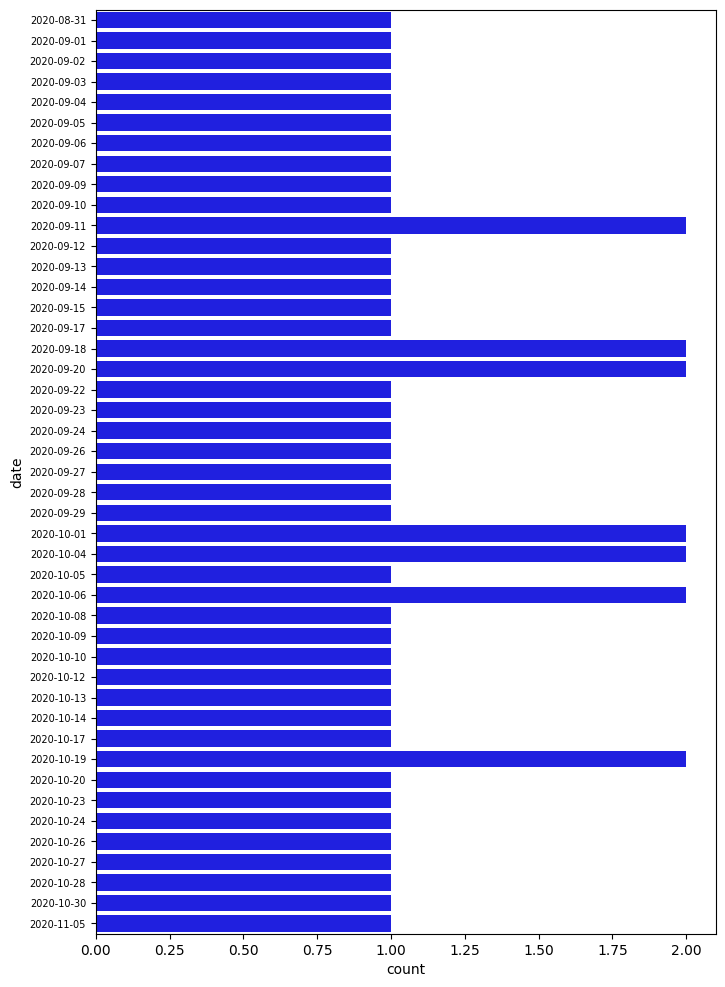

In [138]:
f, ax = plt.subplots(figsize=(8, 12))
sns.barplot(y=countTweetsDay_user.index, x= countTweetsDay_user['count'], color="b")
plt.yticks(fontsize=7);

## Mentions

In [9]:
import pandas as pd
import re

In [2]:
# read Data
PATH_DATA = "../data/final/tweets_66DaysofData.csv"
df = pd.read_csv(PATH_DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40121 entries, 0 to 40120
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    40121 non-null  int64 
 1   user_id     40121 non-null  int64 
 2   user_name   40121 non-null  object
 3   created_at  40121 non-null  object
 4   full_text   40121 non-null  object
 5   retweets    40121 non-null  int64 
 6   favorite    40121 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [17]:
# Code to find the set of every linked twitter account with '@' in the DataFrame
def find_mentions(df):
    dict_mentions = {}
    for txt in df["full_text"].values:
        mentions = re.findall(r"@(\w+)", txt)
        for mention in mentions:
            if mention in dict_mentions:
                dict_mentions[mention] += 1 
            else:
                dict_mentions[mention] = 1
    return dict_mentions
            
mentions = find_mentions(df)

In [24]:
mentions_sorted = sorted(mentions.items(), key=lambda x:x[1], reverse=True)

In [25]:
mentions_sorted[:5]

[('KenJee_DS', 7720),
 ('DataCamp', 707),
 ('kaggle', 550),
 ('thedataprof', 433),
 ('coursera', 245)]

In [29]:
mentions_sorted[0][0]

'KenJee_DS'

In [5]:
for txt in df["full_text"].values[:10]:
    print(txt)

@KenJee_DS looking forward to #66DaysOfData
Very excited to announce the #66daysofdata initiative that I am starting September 1! I encourage you to participate by spending at least 5 minutes learning data science for 66 days straight. All you have to do is tweet what you are working on each day! https://t.co/2T7vmcbgam
@KenJee_DS Looking fwd to #66Daysofdata
Let’s start #66daysofdata https://t.co/IPm1WhHaHB
@KenJee_DS count me in #66daysofdata
Excited to start #66daysofdata with @KenJee_DS. https://t.co/8v9Sjdmxbi
@KenJee_DS Very excited about #66daysofdata! I'm in @KenJee_DS
Very proud to start #66daysofdata
Super Excited to start with #66daysofdata Challenge ! https://t.co/6696jHAzUe
Day 1 of #66DaysofData Right now I’m studying Functional Programming. First Im understanding the Python language and then applying this concepts to data science cases.  @KenJee_DS


## Hashtags

In [1]:
import pandas as pd
import re

In [2]:
# read Data
PATH_DATA = "../data/final/tweets_66DaysofData.csv"
df = pd.read_csv(PATH_DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40121 entries, 0 to 40120
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    40121 non-null  int64 
 1   user_id     40121 non-null  int64 
 2   user_name   40121 non-null  object
 3   created_at  40121 non-null  object
 4   full_text   40121 non-null  object
 5   retweets    40121 non-null  int64 
 6   favorite    40121 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [26]:
def find_hashtags(df: pd.DataFrame):
    hashtag_dict = {}
    for txt in df["full_text"].values:
        hashtags = re.findall(r"#(\w+)", txt)
        for hashtag in hashtags:
            hashtag_low = hashtag.lower()
            if hashtag_low != '66daysofdata':
                if hashtag_low in hashtag_dict:
                    hashtag_dict[hashtag_low] += 1 
                else:
                    hashtag_dict[hashtag_low] = 1
    return hashtag_dict

hashtags = find_hashtags(df)

In [29]:
hashtags_sorted = sorted(hashtags.items(), key=lambda x:x[1], reverse=True)

In [32]:
len(hashtags_sorted)

4104

In [40]:
hashtags_sorted[:100]

[('datascience', 6498),
 ('100daysofcode', 3684),
 ('python', 3481),
 ('machinelearning', 2878),
 ('data', 1818),
 ('dataanalytics', 1344),
 ('knime', 992),
 ('ai', 777),
 ('sql', 721),
 ('100daysofmlcode', 617),
 ('deeplearning', 590),
 ('opensource', 553),
 ('dataviz', 519),
 ('lowcode', 517),
 ('statistics', 472),
 ('nocode', 449),
 ('artificialintelligence', 444),
 ('kaggle', 433),
 ('ml', 364),
 ('learning', 357),
 ('analytics', 348),
 ('programming', 320),
 ('coding', 291),
 ('datavisualization', 291),
 ('pandas', 275),
 ('pythonbot', 265),
 ('rstats', 262),
 ('aibot', 259),
 ('theravitshow', 259),
 ('iot', 248),
 ('code', 246),
 ('codenewbie', 239),
 ('womenwhocode', 227),
 ('visualprogramming', 227),
 ('dataanalysis', 223),
 ('nlp', 219),
 ('30daysofml', 200),
 ('datascientist', 194),
 ('tableau', 179),
 ('javascript', 179),
 ('linux', 171),
 ('tensorflow', 154),
 ('bigdata', 153),
 ('powerbi', 150),
 ('excel', 141),
 ('coursera', 131),
 ('r', 131),
 ('datascientists', 128),
 (

In [41]:
df_hashtags = pd.DataFrame.from_records(hashtags_sorted[:50], columns =['hashtag', 'count'])

In [44]:
df_hashtags['count'].sum()

33870

In [45]:
df_hashtags

,hashtag,count
0,datascience,6498
1,100daysofcode,3684
2,python,3481
3,machinelearning,2878
4,data,1818
5,dataanalytics,1344
6,knime,992
7,ai,777
8,sql,721
9,100daysofmlcode,617
